# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2025 -->

Wegen Reparaturarbeiten an der Staumauer einer [Talsperre](https://de.wikipedia.org/wiki/Talsperre) soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass auf Grundhöhe habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

### 1) Anfangsbedingungen

**1.1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?**

Speichern Sie das Ergebnis (in Metern) in der Variablen `h0` und geben Sie sie aus.

In [2]:
h0 = None 
# Hier eigenen Code schreiben ...

#Formel Kegel: V0= 1/3 A0*h0 -> h0= 3V/A

import math 

A0= 10*10**6
V0= 215*10**6
h0= 3*V0/A0

print ('Der See ist', h0, 'm tief.')


Der See ist 64.5 m tief.


In [3]:
# Hier ist ein Plausibilitäts-Test:
assert 60 < h0 < 80

Vereinfachend werde angenommen, dass die sich ausbildende Strömung sich mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschreiben lasse:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei beschreibt 
 - $u$ die Strömungsgeschwindigkeit des Fluids an einer beliebigen betrachteten Stelle,
 - $p$ den hydrodynamischen Druck, $\rho$ die Dichte und
 - $z$ die Höhe.
 - $g=9{,}81\frac{\text{m}}{\text{s}^2}$ ist die Erdbeschleunigung.

Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g\,z_\text{oben} = \frac{u_\text{unten}^2}{2}+g\,z_\text{unten}
$$

**1.2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ (`u_unten0`) in m/s sowie den [Volumenstrom](https://www.leifiphysik.de/mechanik/stroemungslehre/grundwissen/kontinuitaetsgleichungen) $\dot{V_0}$ (`Vdot0`) in m³/s. Nehmen Sie an, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [4]:
u_unten0 = None
Vdot0 = None
# Hier eigenen Code schreiben ...

import math 


g= 9.81
z_oben = h0
z_unten = 0
u_oben = 0
Auslass = 2

u_unten0 = math.sqrt(2*g*h0)
Vdot0 = Auslass * u_unten0

print ('%-57s: %.2f' % ('Die auszubildende Strömungsgeschwindigkeit am Ausfluss u_unten0 ist', u_unten0), 'm/s')
print ('%-25s: %.2f' % ('Der Volumenstrom Vdot0 ist', Vdot0), 'm³/s')


Die auszubildende Strömungsgeschwindigkeit am Ausfluss u_unten0 ist: 35.57 m/s
Der Volumenstrom Vdot0 ist: 71.15 m³/s


In [5]:
# Hier sind einige Plausibilitäts-Tests:
assert u_unten0 > 30
assert Vdot0 < 80

Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [6]:
# Importiere pi aus numpy
from numpy import pi

# Berechne den "Radius" der Seeoberfläche
r0 = (A0/pi)**0.5
print (f'Radius: {r0/1000:.2f}km')

Radius: 1.78km


### 2) Leerung des Sees

**2.1) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees (in Metern) allgemein abhängig von der enthaltenen Wassermenge bestimmt.**

Beachten Sie, dass sich die Form des Sees [nicht verändert](https://de.wikipedia.org/wiki/Strahlensatz). Der oben gegebene Wert für die Oberfläche gilt also nur bei vollem See.

In [7]:
def tiefe(V):
    # Hier eigenen Code schreiben ...

    alpha = math.atan(r0/h0) # Kegelwinkel
    r= (((3*V)/math.pi)*math.tan(alpha))**(1/3) # Radius r aus Volumen
    h = r/math.tan(alpha) #Tiefe h 
    return h 

In [8]:
# Hier sind einige Plausibilitäts-Tests:
assert abs(h0-tiefe(215e6)) < 1e-5
assert abs(50-tiefe(1e8)) < 0.1

**2.2) Schreiben Sie eine Funktion, die den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt.**

  * Die Funktion soll ein Startvolumen $V_0$ und eine Zeitschrittweite $\Delta t$ übergeben bekommen.
  * Verwenden Sie in den Berechnungen standardmäßig [SI-Einheiten](https://de.wikipedia.org/wiki/Internationales_Einheitensystem).
  * Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.
  * Die Funktion soll alle berechneten Zeiten und die jeweils zugehörigen Tiefen in zwei getrennten Listen zurückgeben.
  
_Hinweise:_
  * Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.
  * Der See kann auch als leer betrachtet werden, wenn im kommenden Zeitschritt mehr Wasser herausfließen würde als noch enthalten ist.

In [9]:
def abfluss(V0, dt):
    # Hier eigenen Code schreiben ...

    t = 0
    V_neu = V0 
    Zeitpunkt = [0]
    Wassertiefe = [tiefe(V0)]

    while V_neu > 0:
        t += dt
        Zeitpunkt.append (t)
        h = tiefe (V_neu)
        u_unten0 = math.sqrt(2*g*h)
        Vdot = Auslass * u_unten0
        V_neu = V_neu - Vdot*dt

        if V_neu < 0:
            Wassertiefe.append(0)
        else: 
            h_neu = tiefe(V_neu)
            Wassertiefe.append(h_neu)
            
    return Zeitpunkt, Wassertiefe

In [10]:
# Hier sind einige Plausibilitäts-Tests:
assert len(abfluss(10,1))==2
assert type(abfluss(10,1)[0])==type(abfluss(10,1)[1])==list

**2.3) Wie lange dauert es, bis der Stausee komplett abgelassen wurde?** 

  * Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:
    * $\Delta t_1$ = 1 Minute
    * $\Delta t_2$ = 4 Tage
  * Zeichnen Sie beide Verläufe in dasselbe Diagramm und diskutieren Sie Auffälligkeiten.

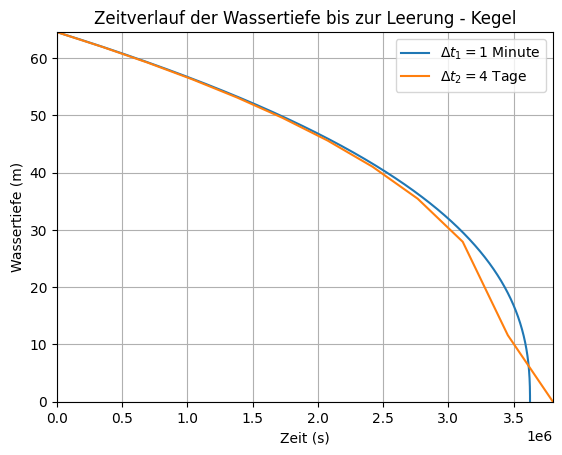

In [11]:
%matplotlib inline 
from matplotlib.pyplot import plot, show
# Plotbefehl: plot(x_werte_liste, y_werte_liste)

# Hier eigenen Code schreiben ...

import matplotlib.pyplot as plt 
dt1 = 60
dt2 = 4*24*3600
Zeitpunkt_1, Wassertiefe_1 = abfluss(V0, dt1)
Zeitpunkt_2, Wassertiefe_2 = abfluss(V0, dt2)

plt.plot(Zeitpunkt_1, Wassertiefe_1, label='$\\Delta t_1 = 1$ Minute')
plt.plot(Zeitpunkt_2, Wassertiefe_2, label='$\\Delta t_2 = 4$ Tage')

plt.xlabel('Zeit (s)')
plt.ylabel('Wassertiefe (m)')
plt.title('Zeitverlauf der Wassertiefe bis zur Leerung - Kegel')
plt.legend()
plt.grid()
plt.margins(0)
show()

### 3) Anderer See

Wiederholen Sie Aufgabenteil 2.3) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Schreiben Sie hierfür möglichst wenig neuen Code.

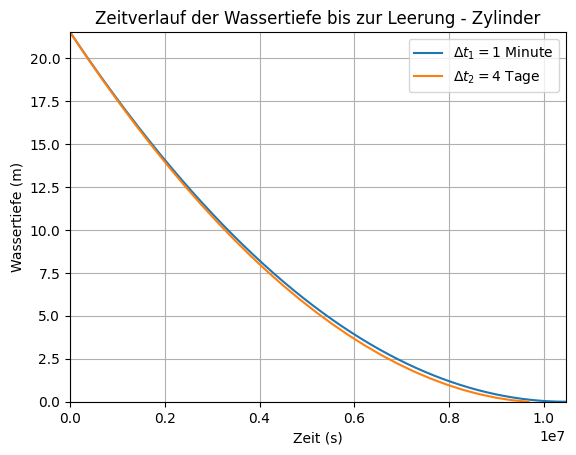

In [12]:
# Hier eigenen Code schreiben ...
import math 
import matplotlib.pyplot as plt

def tiefe_Zylinder(V): #Berechnung der Tiefe
    return V/A0

def abfluss_Zylinder(V0, dt): #Ausfluss 
    t = 0 
    V_neu = V0
    Zeitpunkt = [0]
    Volumen = [V0]
    Wassertiefe = [tiefe_Zylinder(V0)]

    while V_neu > 0:
        t += dt
        Zeitpunkt.append(t)
        h = tiefe_Zylinder(V_neu)
        u_unten0 = math.sqrt(2*g*h) #Ausfluss Beschleunigung 
        Vdot = Auslass * u_unten0 
        V_neu = V_neu - Vdot*dt 

        if V_neu < 0:
            Volumen.append(0)
            Wassertiefe.append(0)
        else:
            Volumen.append(V_neu)
            h_neu = tiefe_Zylinder(V_neu)
            Wassertiefe.append(h_neu)
  
    return Zeitpunkt, Wassertiefe

Zeitpunkt_1, Wassertiefe_1 = abfluss_Zylinder(V0, dt1)
Zeitpunkt_2, Wassertiefe_2 = abfluss_Zylinder(V0, dt2)

plt.plot(Zeitpunkt_1, Wassertiefe_1, label='$\\Delta t_1 = 1$ Minute')
plt.plot(Zeitpunkt_2, Wassertiefe_2, label='$\\Delta t_2 = 4$ Tage')

plt.xlabel('Zeit (s)')
plt.ylabel('Wassertiefe (m)')
plt.title('Zeitverlauf der Wassertiefe bis zur Leerung - Zylinder')
plt.legend()
plt.grid()
plt.margins(0)
show()


**Wichtiger Hinweis:** Wenn Sie ein Notebook fertig programmiert und abgespeichert haben, starten Sie den Kernel (oder das Jupyterlab) noch einmal neu und führen Sie das Notebook von oben bis unten noch einmal komplett aus, um Fehler zu vermeiden.